<a href="https://colab.research.google.com/github/yusufSadur/fastai-v3/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libs

import glob
import shutil
import os

## Importing libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

## Re-sizing all the images

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'

## Using VGG16 to create the model

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

58892288/58889256 [==============================] - 1s 0us/step


### This is to NOT train existing weights

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

### Getting the number of folders which are my output classes

In [ ]:
folders = glob(train_path + '/*')
folders

['/content/drive/MyDrive/dataset/train/healthy',
 '/content/drive/MyDrive/dataset/train/late_blight']

### Creating a flatten layer to flatten the vgg output what ever we got 

In [ ]:
x = Flatten()(vgg.output)

### Adding our last layer

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

### Creating a model object

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

### View the structure of the model

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Telling the model what cost and optimization method to use

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### Use the Image Data Generator to import the images from the dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 2557 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'healthy': 0, 'late_blight': 1}

In [ ]:
testing_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 1146 images belonging to 2 classes.


In [ ]:
testing_set.class_indices

{'healthy': 0, 'late_blight': 1}

### Fit the model 

In [ ]:
result = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 100%
# accuracy: 99%

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 969s 12s/step - loss: 0.5492 - accuracy: 0.7944 - val_loss: 0.0640 - val_accuracy: 0.9808
Epoch 2/10
80/80 [==============================] - 36s 450ms/step - loss: 0.0320 - accuracy: 0.9965 - val_loss: 0.0479 - val_accuracy: 0.9860
Epoch 3/10
80/80 [==============================] - 37s 462ms/step - loss: 0.0263 - accuracy: 0.9942 - val_loss: 0.0326 - val_accuracy: 0.9921
Epoch 4/10
80/80 [==============================] - 37s 465ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 5/10
80/80 [==============================] - 37s 462ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch 6/10
80/80 [==============================] - 37s 458ms/step - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0345 - val_accuracy: 0.9904
Epoch 7/10
80/80 [==============================] - 37s 456ms/step - loss: 0.0075 - accuracy: 0.9997 - val_loss: 0.0531 - val_accuracy: 0.9808


In [ ]:
#getting the accuracy
model.evaluate_generator(training_set)
# output [loss, accuracy]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.00445579132065177, 0.9992178082466125]

In [ ]:
#getting the validation accuracy
model.evaluate_generator(testing_set)
# output [val_loss, val_acc]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0197020061314106, 0.9930192232131958]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[571   2]
 [138 435]]
Testing Accuracy: 0.8778359511343804
Sensitivity: 0.8053596614950634
Specificity: 0.9954233409610984


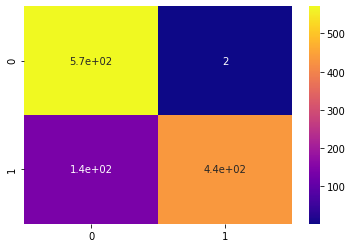

In [ ]:
# Generate Confusion Matrix
import tensorflow as tf
y_actual = []
y_test = []

for i in os.listdir('/content/drive/MyDrive/dataset/test/healthy/'):
    img = image.load_img('/content/drive/MyDrive/dataset/test/healthy/'+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(0)
    
for i in os.listdir('/content/drive/MyDrive/dataset/test/late_blight/'):
    img = image.load_img('/content/drive/MyDrive/dataset/test/late_blight/'+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(1)
    
y_actual = np.array(y_actual)
y_test = np.array(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)

import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)

model_TP = cm[0][0]
model_TN = cm[1][1]
model_FN = cm[1][0]
model_FP = cm[0][1]

print(cm)
print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
print("Sensitivity:", (model_TP) / (model_TP + model_FN))
print("Specificity:", (model_TN) / (model_TN + model_FP))

### Plot the loss

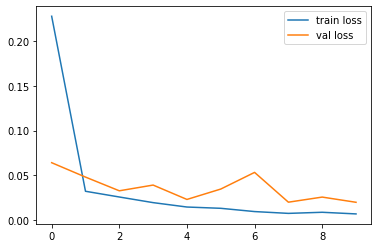

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

### Plot the accuracy

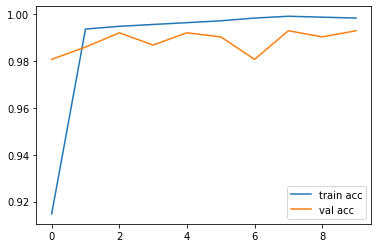

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result.history

{'accuracy': [0.9147438406944275,
  0.9937426447868347,
  0.9949159026145935,
  0.995698094367981,
  0.9964802265167236,
  0.9972624182701111,
  0.9984356760978699,
  0.9992178082466125,
  0.9988267421722412,
  0.9984356760978699],
 'loss': [0.22784149646759033,
  0.032036300748586655,
  0.025629922747612,
  0.019327523186802864,
  0.014409570954740047,
  0.012974089942872524,
  0.009325948543846607,
  0.007298056501895189,
  0.008535690605640411,
  0.006699430290609598],
 'val_accuracy': [0.9808027744293213,
  0.9860383868217468,
  0.9921466112136841,
  0.9869109988212585,
  0.9921466112136841,
  0.9904013872146606,
  0.9808027744293213,
  0.9930192232131958,
  0.9904013872146606,
  0.9930192232131958],
 'val_loss': [0.06399542093276978,
  0.047912970185279846,
  0.03256237879395485,
  0.03897356241941452,
  0.022889982908964157,
  0.034515660256147385,
  0.05314498767256737,
  0.019824286922812462,
  0.02552977204322815,
  0.019702009856700897]}

### Saving the model which used VGG16

In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('model_vgg16.h5')


from google.colab import files
files.download("model_vgg16.h5")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: ignored

## Using the saved model for prediction

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
import tensorflow as tf


In [ ]:

CATEGORIES = ['LateBlight-Incurable', 'Healthy']

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
    return new_array.reshape(1, 224, 224, 3)

load_modal = tf.keras.models.load_model('model_vgg16.h5')

In [ ]:
predict = load_modal.predict([prepare('/content/drive/MyDrive/dataset/test/healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG')])
print(CATEGORIES[int(round(predict[0][0]))])
print(predict[0][0])

In [ ]:
predict = load_modal.predict([prepare('/content/drive/MyDrive/dataset/test/healthy/04c78dad-c1eb-4a1b-bfeb-da4c7cc528e1___RS_HL 9688.JPG')])
print(CATEGORIES[int(round(predict[0][0]))])
print(predict[0][0])

In [ ]:
predict = load_modal.predict([prepare('./content/drive/MyDrive/dataset/test/late_blight/00355ec2-f12c-4015-b8f9-94354f69ce22___RS_Late.B 5311.JPG')])
print(CATEGORIES[int(round(predict[0][0]))])
print(predict[0][0])

In [ ]:
predict = load_modal.predict([prepare('/content/drive/MyDrive/dataset/train/late_blight/670337a4-55b1-4312-8644-3545b1fcc06f___GHLB2 Leaf 8902.JPG')])
print(CATEGORIES[int(round(predict[0][0]))])
print(predict[0][0])